In [1]:
%run functions.ipynb

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print("(1, 0) labels count in train test: {} {}".format((np.count_nonzero(y_train==1), np.count_nonzero(y_train==0)), 
                                                        (np.count_nonzero(y_test==1), np.count_nonzero(y_test==0))))
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


In [3]:
logistic_params = {'C' : [0.01, 0.05, 0.1, 0.2, 0.4], 'penalty' : ['l1', 'l2'], 'solver' : ['liblinear']}
tree_params = {'n_estimators' : [2500, 5000], 'max_depth': [8], 'min_samples_leaf' : [5]}

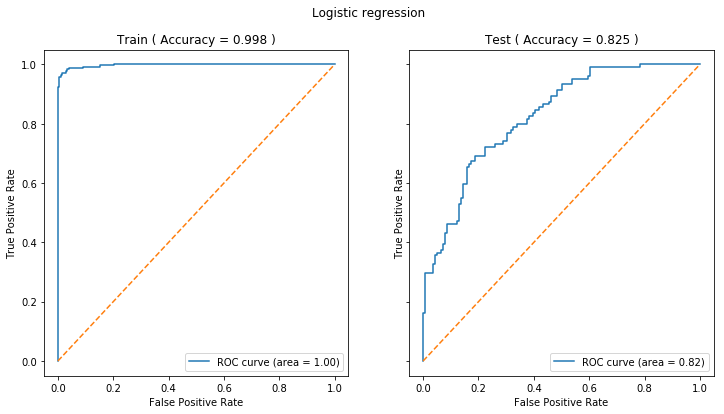

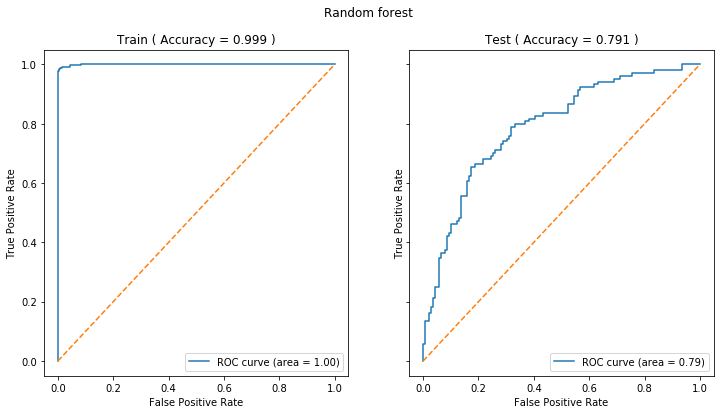

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [ ]:
logit_cv = GridSearchCV(LogisticRegression(), cv=5, param_grid=logistic_params, scoring='roc_auc')
tree_cv = GridSearchCV(RandomForestClassifier(), cv=5, param_grid=tree_params, scoring='roc_auc')

clf_logit = fit_clf(logit_cv, X_train, y_train, X_test, y_test, title='Logistic regression')
clf_forest = fit_clf(tree_cv, X_train, y_train, X_test, y_test, title='Random forest')

print(clf_logit.best_estimator_)
print(clf_forest.best_estimator_)

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


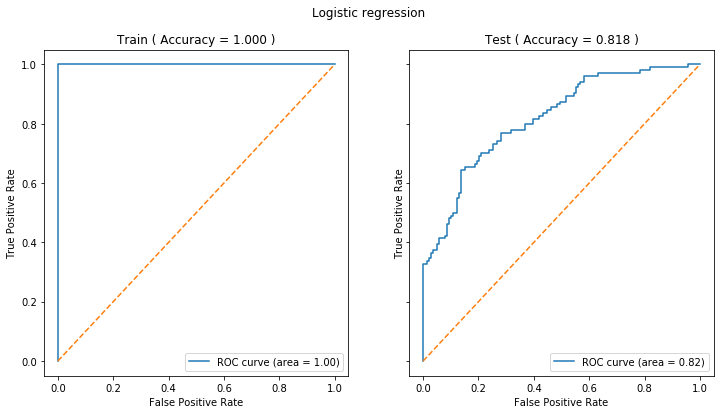

In [ ]:
logit_cv = GridSearchCV(LogisticRegression(), cv=5, param_grid=logistic_params, scoring='roc_auc')
tree_cv = GridSearchCV(RandomForestClassifier(), cv=5, param_grid=tree_params, scoring='roc_auc')

clf_logit_std = fit_clf(logit_cv, X_std_train, y_train, X_std_test, y_test, title='Logistic regression')
clf_forest_std = fit_clf(tree_cv, X_std_train, y_train, X_std_test, y_test, title='Random forest')

print(clf_logit_std.best_estimator_)
print(clf_forest_std.best_estimator_)

In [ ]:
len(np.where(np.abs(clf_logit_std.best_estimator_.coef_[0]) > 0)[0])

In [ ]:
plt.figure()
plt.plot(np.arange(clf_logit.best_estimator_.coef_.shape[1]), clf_logit.best_estimator_.coef_[0])
plt.plot(np.arange(clf_logit_std.best_estimator_.coef_.shape[1]), clf_logit_std.best_estimator_.coef_[0])
plt.show()

In [4]:
from sklearn.linear_model import SGDClassifier

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


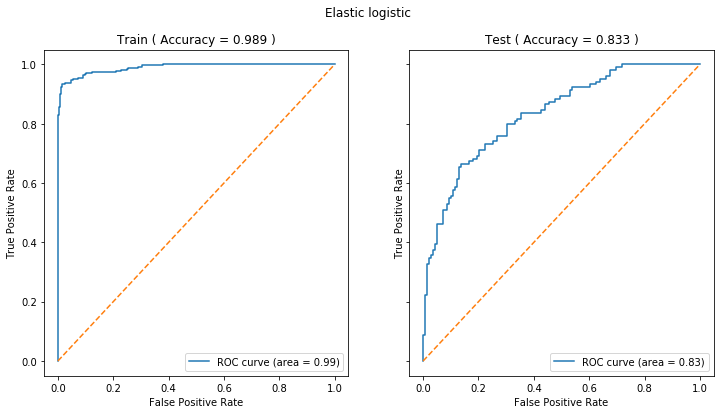

In [5]:
elastic_params = {'l1_ratio' : [0.1, 0.2, 0.4, 0.8, 1], 'alpha' : [0.0001, 0.001, 0.01, 0.1, 1]}
elastic_cv = RandomizedSearchCV(SGDClassifier(loss='log', penalty='elasticnet', max_iter=5000), param_distributions=elastic_params, cv=3, n_iter=15, n_jobs=5, scoring='roc_auc')
clf = fit_clf(elastic_cv, X_std_train, y_train, X_std_test, y_test, title='Elastic logistic')

In [19]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.1, learning_rate='optimal', loss='log', max_iter=5000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


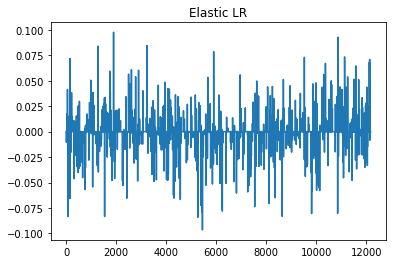

In [6]:
plot_logit_weights(clf.best_estimator_, "Elastic LR")

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


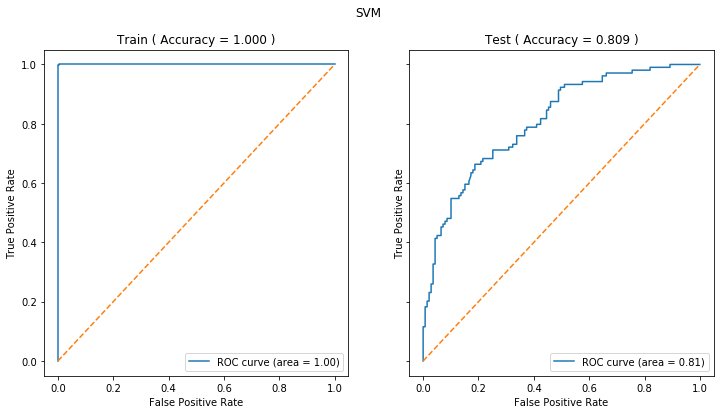

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [4]:
svm_params = {'C' : [0.01, 0.05, 0.1, 0.2, 0.4], 'kernel' : ['poly', 'rbf', 'sigmoid']}
svm_cv = RandomizedSearchCV(SVC(probability=True, gamma='scale'), cv=5, param_distributions=svm_params, scoring='roc_auc', n_iter=20)

clf_svm = fit_clf(svm_cv, X_train, y_train, X_test, y_test, title='SVM')

print(clf_svm.best_estimator_)

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWar

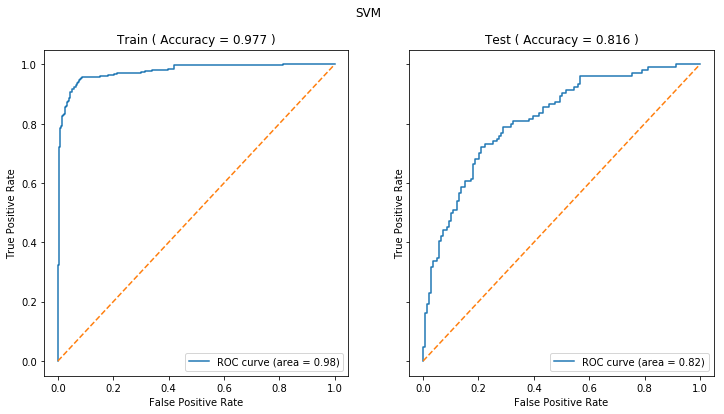

LinearSVC(C=0.05, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)


In [5]:
from sklearn.svm import LinearSVC

svm_params = {'C' : [0.01, 0.05, 0.1, 0.2, 0.4]}
svm_cv = RandomizedSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=10000), cv=5, param_distributions=svm_params, scoring='roc_auc', n_iter=20)

clf_svm = fit_clf(svm_cv, X_train, y_train, X_test, y_test, title='SVM')

print(clf_svm.best_estimator_)

In [ ]:
rlr_params = {'C' : [0.01, 0.05, 0.1, 0.2, 0.4, 0.7, 1.0, 10], 'n_estimators' : [100, 250, 500, 1000, 2500], 'n_variables' : [100, 250, 500, 1000, 2500]}
rlr_cv = RandomizedSearchCV(RandomLogisticsRegressions(penalty='l1'), cv=5, param_distributions=rlr_params, scoring='roc_auc', n_iter=30)

clf_rlr = fit_clf(rlr_cv, X_train, y_train, X_test, y_test, title='Random logistics regressions')

print(clf_rlr.best_estimator_)